In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

The dataset taken for the task includes the details of customers includes their marital status, their income, number of items purchased, types of items purchased, and so on.

In [14]:
df = pd.read_csv('new.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


To check the shape of the dataset we can use data.shape method.

In [15]:
df.shape

(2240, 29)

To get the information of the dataset like checking the null values, count of values, etc. we will use .info() method.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Improving the values in the Accepted column.

In [22]:
# Convert the 'AcceptedCmp1' column to string type before using .str
df['AcceptedCmp1'] = df['AcceptedCmp1'].astype(str).str.replace('AcceptedCmp1', '')

To check the null values in the dataset.

In [23]:
for col in df.columns:
  temp = df[col].isnull().sum()
  if temp > 0:
    print(f'column {col} contains {temp} null values.')

column Income contains 24 null values.


Now, once we have the count of the null values and we know the values are very less we can drop them (it will not affect the dataset much).

In [24]:
df = df.dropna()
print("Totoal missing values are:", len(df))

Totoal missing values are: 2216


To find the total number of unique values in each column we can use data.unique() method.


df.nunique()

In [25]:
df.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


Here we can observe that there are columns which contain single values in the whole column so, they have no relevance in the model development.

Also dataset has a column Dt_Customer which contains the date column, we can convert into 3 columns i.e. day, month, year.

In [28]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

Now we have all the important features, we can now drop features like Z_CostContact, Z_Revenue, Dt_Customer.

In [30]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],
        axis=1,
        inplace=True)

# Data Visualization and Analysis

Data visualization is the graphical representation of information and data in a pictorial or graphical format. Here we will be using bar plot and count plot for better visualization.

In [31]:
floats, objects =[], []
for col in df.columns:
  if df[col].dtype == object:
    objects.append(col)
  elif df[col].dtype == float:
    floats.append(col)

print(objects)
print(floats)

['Education', 'Marital_Status', 'AcceptedCmp1']
['Income']


To get the count plot for the columns of the datatype – object, refer the code below.

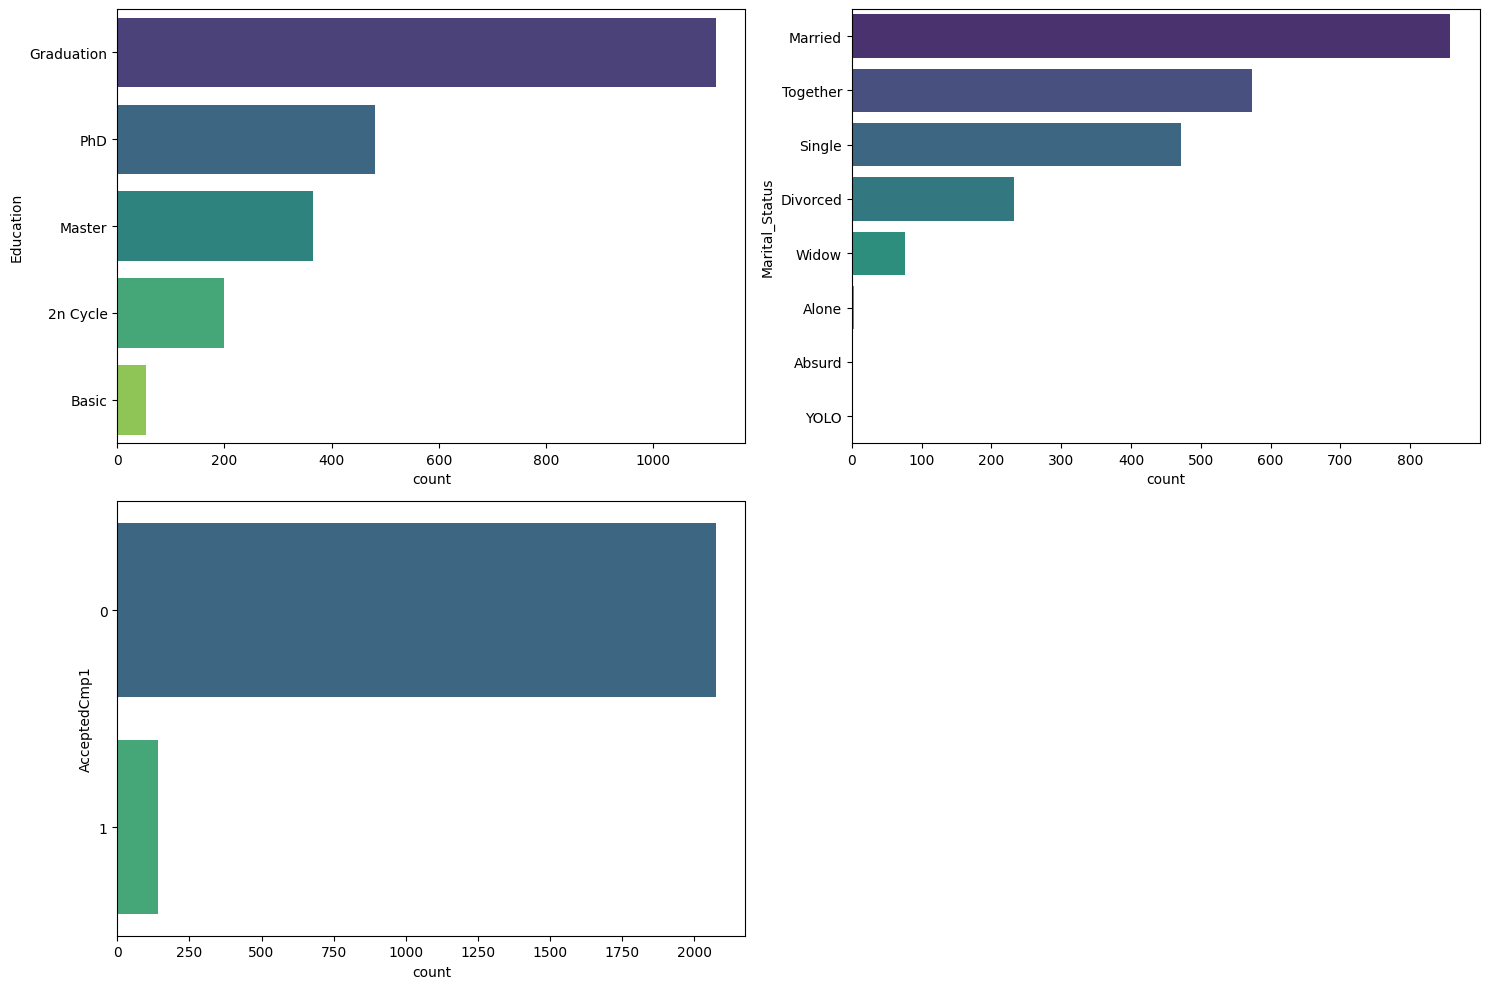

In [37]:
plt.subplots(figsize=(15, 10))

categorical_cols = ['Education', 'Marital_Status', 'AcceptedCmp1']
# Adjust this list with the actual names of your categorical columns

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.xlabel('count')

plt.tight_layout()
plt.show()

Let’s check the value_counts of the Marital_Status of the data.

In [38]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


Now lets see the comparison of the features with respect to the values of the responses.

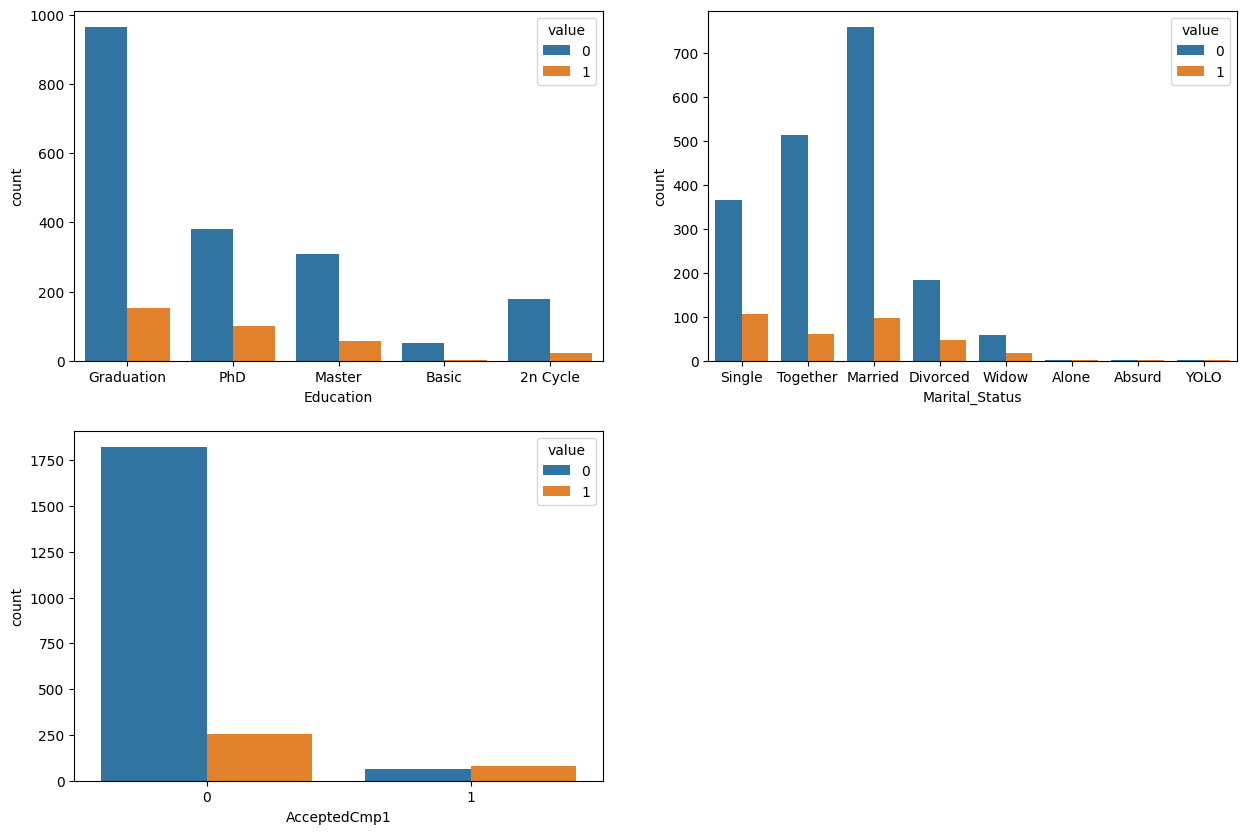

In [40]:
plt.subplots(figsize=(15, 10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)
    # Use melt to transform the data to long form
    df_melted = df.melt(id_vars=[col], value_vars=['Response'], var_name='hue')
    sb.countplot(x=col, hue='value', data=df_melted)
plt.show()

# This code is modified by Susobhan Akhuli

#Label Encoding  

Label Encoding is used to convert the categorical values into the numerical values so that model can understand it.

In [41]:
for col in df.columns:
  if df[col].dtype == object:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

Heatmap is the best way to visualize the correlation among the different features of dataset. Let’s give it the value of 0.8

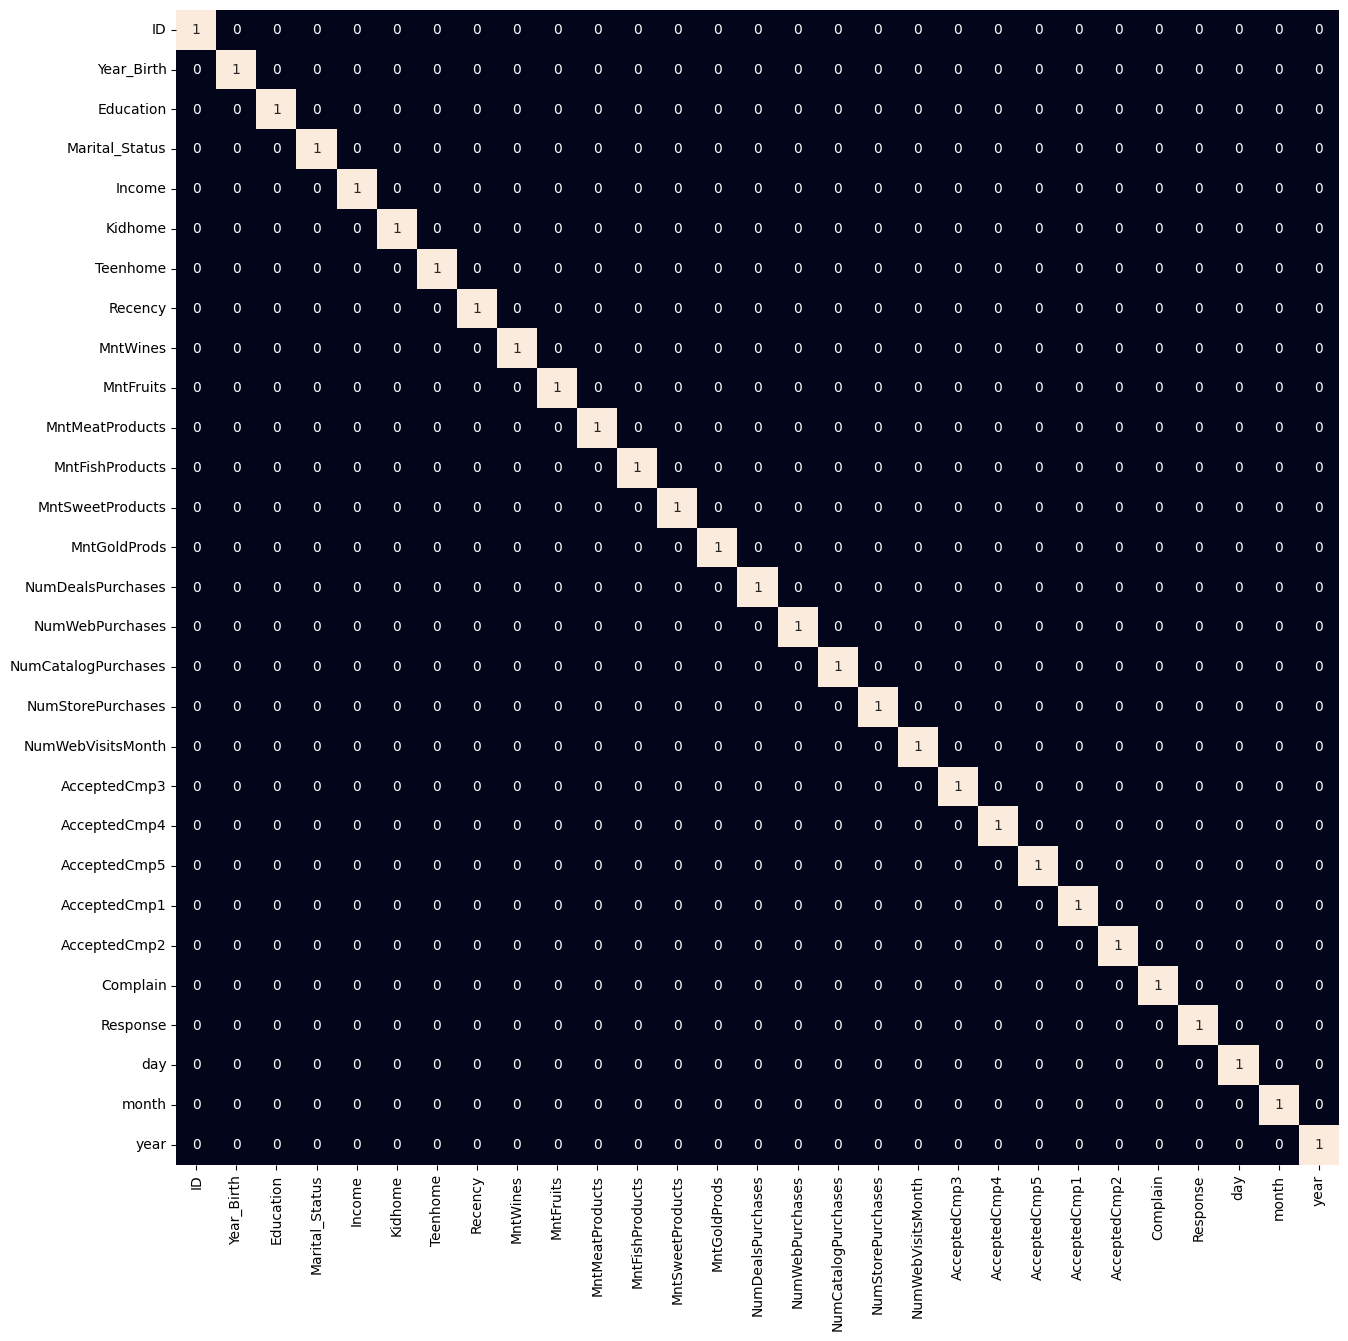

In [42]:
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

# Standardization

Standardization is the method of feature scaling which is an integral part of feature engineering. It scales down the data and making it easier for the machine learning model to learn from it. It reduces the mean to ‘0’ and the standard deviation to ‘1’.

In [44]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

# Segmentation

We will be using T-distributed Stochastic Neighbor Embedding. It helps in visualizing high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the values to low-dimensional embedding.

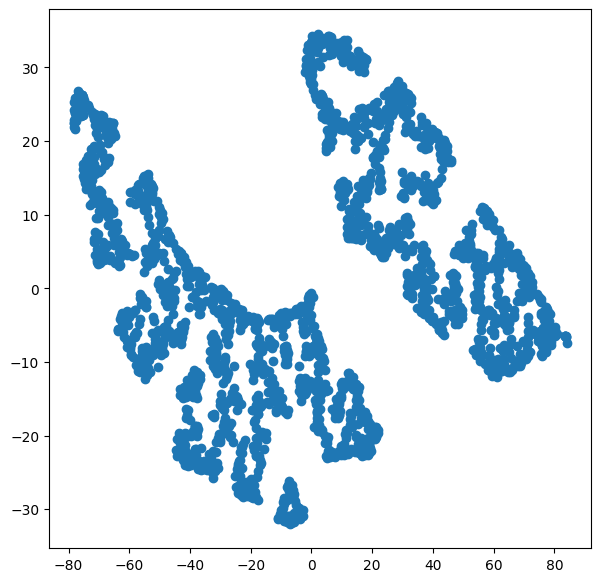

In [46]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()


There are certainly some clusters which are clearly visual from the 2-D representation of the given data. Let’s use the KMeans algorithm to find those clusters in the high dimensional plane itself

KMeans Clustering can also be used to cluster the different points in a plane.

In [47]:
error = []
for n_clusters in range(1, 21):
  model = KMeans(init='k-means++',
                 n_clusters=n_clusters,
                 max_iter=500,
                 random_state=22)
  model.fit(df)
  error.append(model.inertia_)

Here inertia is nothing but the sum of squared distances within the clusters.

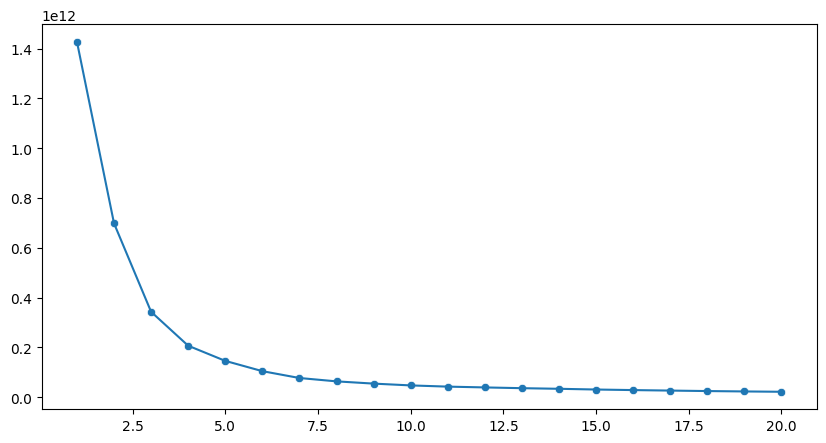

In [48]:
plt.figure(figsize=(10, 5))
sb.lineplot(x=range(1,21), y=error)
sb.scatterplot(x=range(1,21), y=error)
plt.show()

Here by using the elbow method we can say that k = 6 is the optimal number of clusters that should be made as after k = 6 the value of the inertia is not decreasing drastically.

In [49]:
# create clustering model with optimal k=5
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df)

Scatterplot will be used to see all the 6 clusters formed by KMeans Clustering.

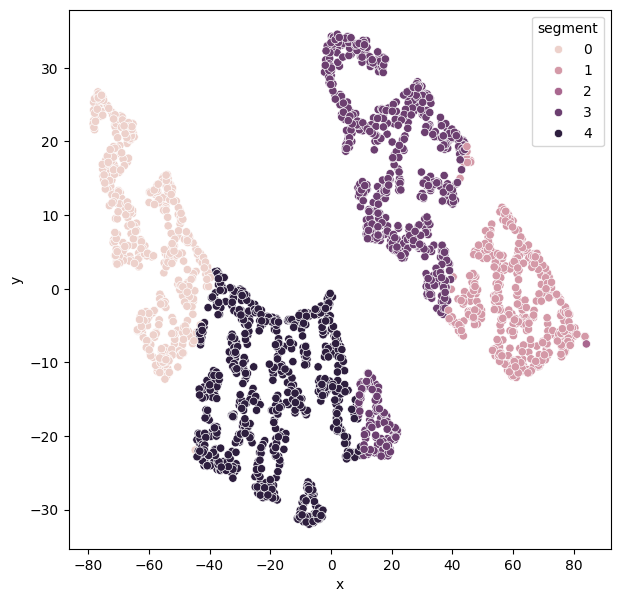

In [51]:
plt.figure(figsize=(7, 7))
# Create a DataFrame with the tsne_data and segments
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})
# Use the DataFrame in the scatterplot function
sb.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()

# This code is modified by Susobhan Akhuli
